# TCS Stock Prediction using LSTM

In [1]:
import pandas as pd
#dataset load
df=pd.read_csv(r"E:\stock\TCS.csv")

In [2]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [93]:
data_available_from=df['Date'][0]
data_available_to=df['Date'][4138]

In [94]:
print(f'data_available_from: '+data_available_from+' data_available_to: '+data_available_to)

data_available_from: 2004-08-25 data_available_to: 2021-04-30


In [97]:
df1=df[['Open','High','Low','Close']]

In [98]:
df1

,Open,High,Low,Close
0,1198.70,1198.70,979.00,987.95
1,992.00,997.00,975.30,979.00
2,982.40,982.40,958.55,962.65
3,969.90,990.00,965.00,986.75
4,986.50,990.00,976.00,988.10
...,...,...,...,...
4134,3102.05,3153.00,3088.05,3100.80
4135,3106.00,3136.10,3103.00,3132.00
4136,3149.95,3151.00,3112.00,3124.10
4137,3145.60,3157.35,3105.50,3115.25


In [99]:
import matplotlib.pyplot as plt

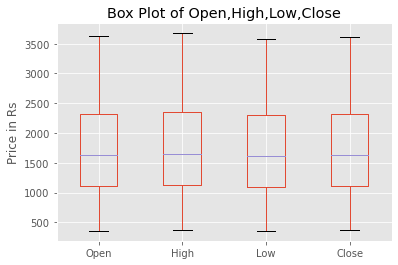

In [103]:
plt.style.use('ggplot')
df1[['Open','High','Low','Close']].boxplot()
plt.title('Box Plot of Open,High,Low,Close')
plt.ylabel('Price in Rs')
plt.show()

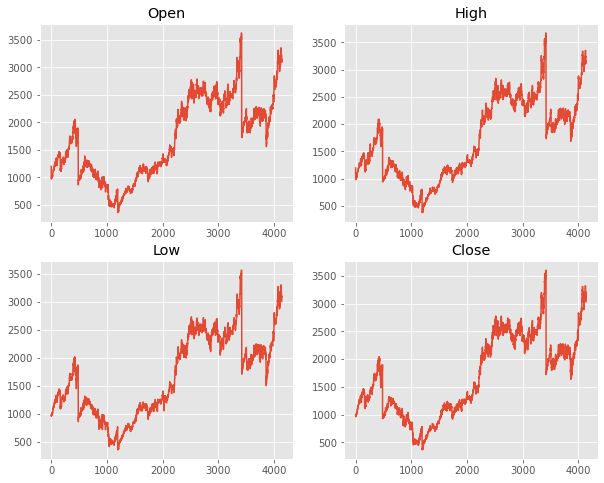

In [104]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.plot(df1['Open'])
plt.title('Open')
plt.subplot(2,2,2)
plt.plot(df1['High'])
plt.title('High')
plt.subplot(2,2,3)
plt.plot(df1['Low'])
plt.title('Low')
plt.subplot(2,2,4)
plt.plot(df1['Close'])
plt.title('Close')
plt.show()

In [105]:
df1=df1[['Close']]
df1

,Close
0,987.95
1,979.00
2,962.65
3,986.75
4,988.10
...,...
4134,3100.80
4135,3132.00
4136,3124.10
4137,3115.25


In [106]:
#NORMALIZATION
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [107]:
df1

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.85184041],
       [0.84910644],
       [0.82451615]])

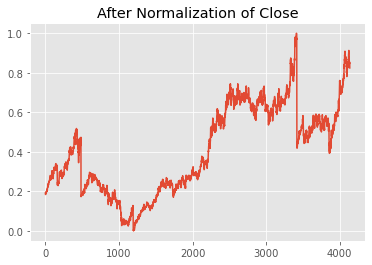

In [108]:
plt.plot(df1)
plt.title('After Normalization of Close')
plt.show()

In [109]:
training_size=int(len(df1)*0.65)
test_size=int(len(df1))-training_size

In [110]:
training_size

2690

In [111]:
test_size

1449

In [112]:
len(df)

4139

In [113]:
train_data=df1[:training_size,:]

In [114]:
train_data.shape

(2690, 1)

In [115]:
len(train_data)

2690

In [116]:
test_data=df1[training_size:,:1]

In [117]:
td=np.empty_like(df1)
td[:,:]=np.nan
td[training_size:]=test_data

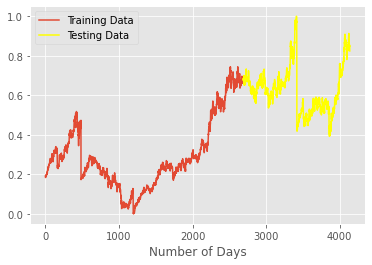

In [120]:
plt.plot(df1[:training_size,:])
plt.plot(td,color='yellow')
plt.legend(['Training Data','Testing Data'])
plt.xlabel('Number of Days')
plt.show()

In [121]:
#Preperaing Dataset X_train and X_test as (-1,100) and y_train and y_test as (-1,1)
def creating_dataset(df,window=1):
    dataX,dataY=[],[]
    for i in range(len(df)-window-1):
        a=df[i:i+window,0]
        dataX.append(a)
        dataY.append(df[i+window,0])
    return np.array(dataX),np.array(dataY)

In [122]:
X_train,y_train=creating_dataset(train_data,100)
X_test,y_test=creating_dataset(test_data,100)

In [123]:
X_train.shape,y_train.shape

((2589, 100), (2589,))

In [124]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [125]:
X_train.shape

(2589, 100, 1)

In [126]:
X_test.shape

(1348, 100, 1)

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [128]:
model=Sequential()

In [129]:
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])

In [130]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [131]:
model.fit(X_train,y_train,epochs=10,batch_size=64)

Epoch 1/10
41/41 [==============================] - 10s 119ms/step - loss: 0.0141 - accuracy: 3.8625e-04
Epoch 2/10
41/41 [==============================] - 5s 117ms/step - loss: 8.0991e-04 - accuracy: 3.8625e-04
Epoch 3/10
41/41 [==============================] - 5s 120ms/step - loss: 7.3822e-04 - accuracy: 3.8625e-04
Epoch 4/10
41/41 [==============================] - 5s 118ms/step - loss: 7.0819e-04 - accuracy: 3.8625e-04
Epoch 5/10
41/41 [==============================] - 5s 118ms/step - loss: 6.8116e-04 - accuracy: 3.8625e-04
Epoch 6/10
41/41 [==============================] - 5s 118ms/step - loss: 6.6604e-04 - accuracy: 3.8625e-04
Epoch 7/10
41/41 [==============================] - 5s 119ms/step - loss: 6.3638e-04 - accuracy: 3.8625e-04
Epoch 8/10
41/41 [==============================] - 5s 119ms/step - loss: 6.1270e-04 - accuracy: 3.8625e-04
Epoch 9/10
41/41 [==============================] - 5s 119ms/step - loss: 5.2607e-04 - accuracy: 3.8625e-04
Epoch 10/10
41/41 [============

In [132]:
test_predict_val=model.predict(X_test)

43/43 [==============================] - 2s 23ms/step


In [133]:
test_predict_val.shape

(1348, 1)

In [134]:
test_predict_val=scaler.inverse_transform(test_predict_val)

In [135]:
y_test.shape

(1348,)

In [136]:
y_test=y_test.reshape(-1,1)

In [137]:
y_test1=scaler.inverse_transform(y_test)

In [138]:
y_test1.shape

(1348, 1)

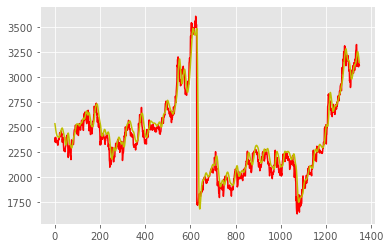

In [139]:
plt.plot(y_test1,color='r')
plt.plot(test_predict_val,color='y')

In [140]:
train_predict_val=model.predict(X_train)

81/81 [==============================] - 2s 24ms/step


In [141]:
train_predict_val=scaler.inverse_transform(train_predict_val)

In [142]:
trainPredict=np.empty_like(df1)
trainPredict[:,:]=np.nan
trainPredict[100:len(train_predict_val)+100,:]=train_predict_val

In [143]:
testPredict=np.empty_like(df1)
testPredict[:,:]=np.nan
testPredict[len(train_predict_val)+200+1:len(df1)-1,:]=test_predict_val

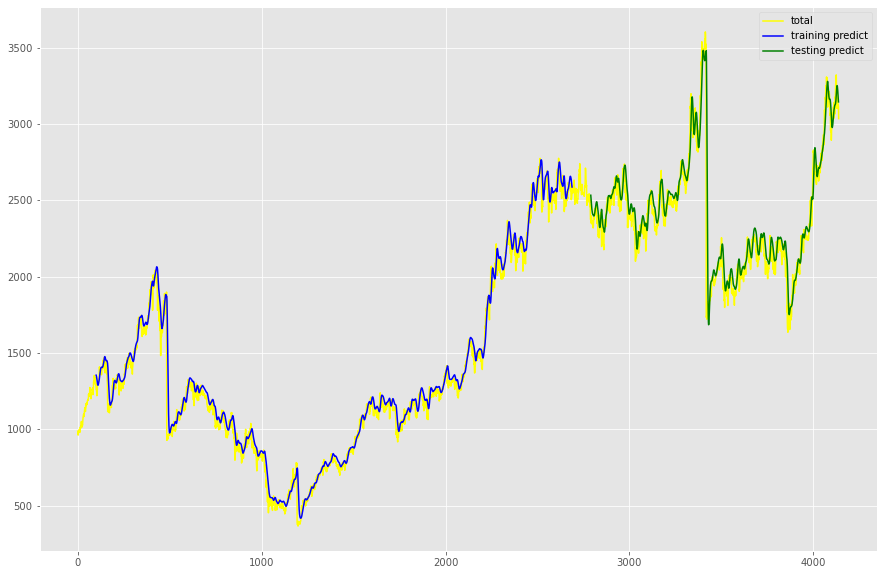

In [144]:
plt.figure(figsize=(15,10))
a=plt.plot(scaler.inverse_transform(df1),color='yellow')
b=plt.plot(trainPredict,'blue')
c=plt.plot(testPredict,'green')
plt.legend(['total','training predict','testing predict '])

In [145]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_test1,test_predict_val))

132.05773823938037